# ABDUL MUNEEB
muneebabdul2000@gmail.com

# Problem statement:
    Predict surviving probability for passengers of the Titanic

# Target:
    Build a lLogistic Regression Model to predict surviving probability.

In [1]:
#supress warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import various modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
#save training and testing dataset in respective dataframes
dftrain= pd.read_csv('train.csv', encoding = 'ISO-8859_1')
dftest= pd.read_csv('test.csv', encoding = 'ISO-8859_1')

In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dftest.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [7]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# let us analyse all the features one by one

In [8]:
features=dftest.columns
print(features)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# survived
this feature tells us how many passengers have survived the tragedy.

Text(0.5, 1.0, 'Passengers count who survived')

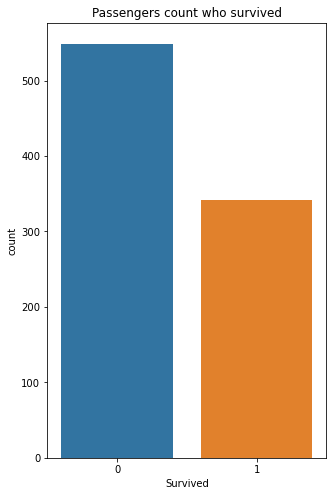

In [9]:
plt.figure(figsize=(5,8))
sns.countplot(dftrain['Survived']).set_title('Passengers count who survived')

# pclass:
    this shows us the distribution of passengers who survived or died across three class of travelling

Text(0.5, 1.0, 'Survivors and deads count by class')

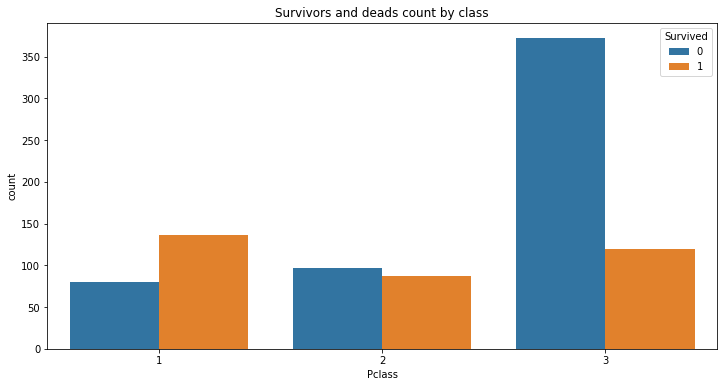

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='Pclass', hue='Survived', data=dftrain).set_title('Survivors and deads count by class')

# name:
    this attribute tells us the names of the passengers

In [11]:
dftrain.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

# sex: 
    this feature tells us weather the passenger was amle or female

Text(0.5, 1.0, 'Passengers count by sex')

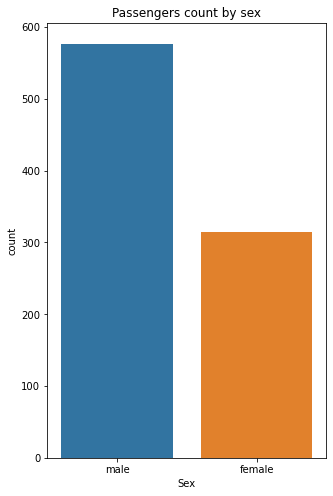

In [12]:
plt.figure(figsize=(5,8))
sns.countplot(dftrain['Sex']).set_title('Passengers count by sex')

# age:
    this feature tells us the age of the passenger

<AxesSubplot:xlabel='Age'>

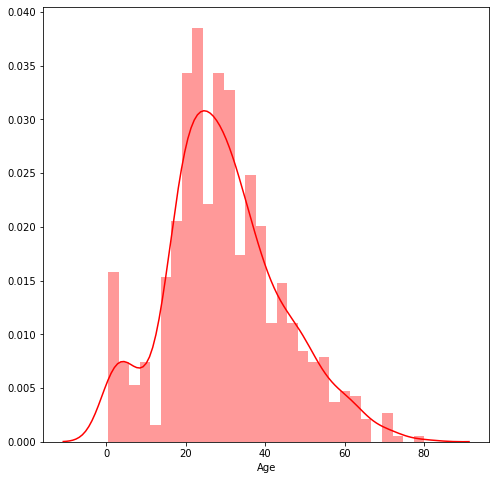

In [13]:
plt.figure(figsize=(8,8))
sns.distplot(dftrain['Age'], color='r', bins=30)

# sibsp:
    this attribute tells us about the no. of sibling/ spouse who were travelling with the passenger

Text(0.5, 1.0, 'count of sib/sp')

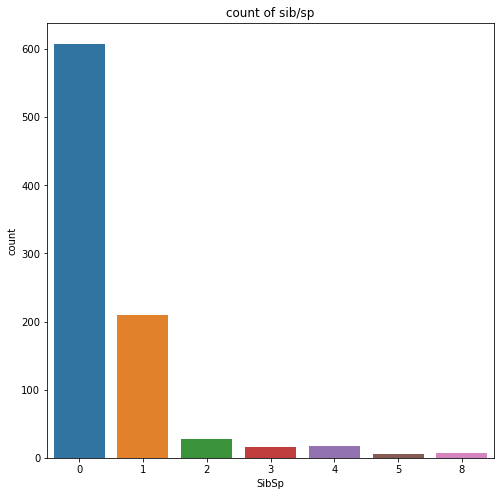

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(dftrain['SibSp']).set_title('count of sib/sp')

# Parch:
    this attribute tells us about the no. of childre/parents who were travelling with the passenger

Text(0.5, 1.0, 'count of sib/sp')

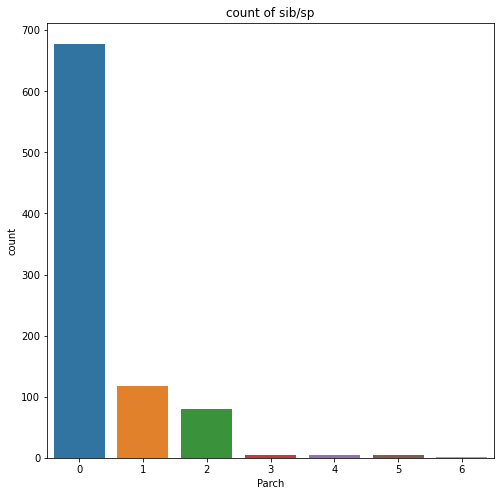

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(dftrain['Parch']).set_title('count of sib/sp')

# ticket:
    this attribute provide us with ticket details

In [16]:
dftrain.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

# fare:
    this attribute tells us about the fare amount ditribution among passengers

<AxesSubplot:xlabel='Fare'>

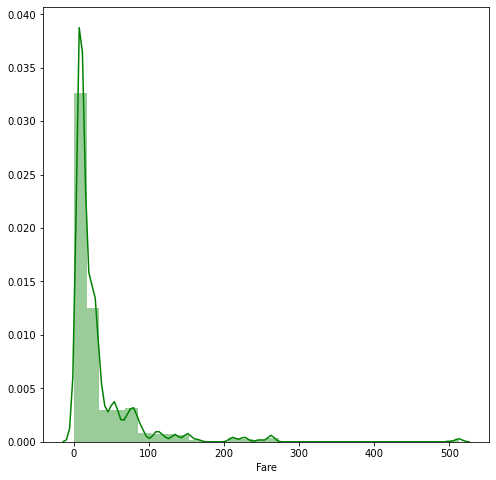

In [17]:
plt.figure(figsize=(8,8))
sns.distplot(dftrain['Fare'], color='g', bins=30)

In [18]:
dftrain.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

# embarked:
    this attribute gives teh information of boarding point of the passenger S = Southampton C = Cherbourg Q = Queenstown

Text(0.5, 1.0, 'count of sib/sp')

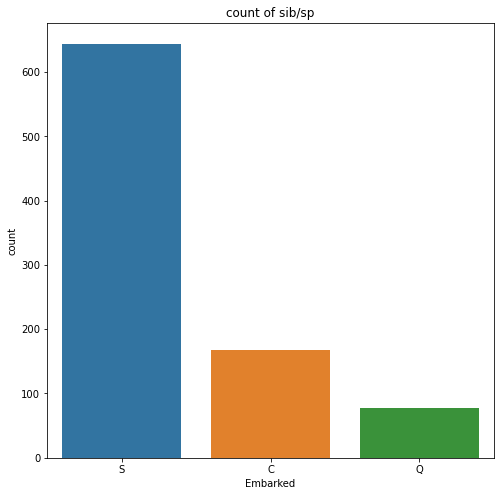

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(dftrain['Embarked']).set_title('count of sib/sp')

# Dataset Preparation:
    let us handle null values and non integral columns

In [20]:
dftrain.isnull().sum()/len(dftrain.index)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [21]:
dftest.isnull().sum()/len(dftest.index)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [22]:
# 'Cabin' has 78% of null values therefore we won't use it in our model building
dftrain.drop(['Cabin'], axis = 1,inplace=True)
dftest.drop(['Cabin'], axis = 1,inplace=True)

In [23]:
#replacing NaNs with average values 
dftrain.fillna(dftrain.mean(), inplace=True)
dftest.fillna(dftest.mean(), inplace=True)

In [24]:
# now fare, ticket, name are object type variables that are irrelevent for model building, we will exclude them
dftrain.drop(['Name','Ticket'], axis = 1,inplace=True)
dftest.drop(['Name','Ticket'], axis = 1,inplace=True)

We can see that your dataset has column with values as 'Yes' or 'No'.

In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'female' and 0 is a 'male'.

Also we will change the feature 'embarked' into categorical variable.

In [25]:
# Get the dummy variables for the feature '' and store it in a new variable - 'status'
dftrain['Embarked'].fillna('S', inplace=True)

In [26]:
dftrain.isnull().sum()/len(dftrain.index)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [27]:
dftest.isnull().sum()/len(dftest.index)*100

PassengerId    0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [28]:
status = pd.get_dummies(dftrain['Embarked'])
dftrain = pd.concat([dftrain, status], axis = 1)
dftrain.drop(['Embarked','Q'], axis = 1,inplace=True)

In [29]:
status = pd.get_dummies(dftest['Embarked'])
dftest = pd.concat([dftest, status], axis = 1)
dftest.drop(['Embarked','Q'], axis = 1,inplace=True)

In [30]:
status = pd.get_dummies(dftrain['Pclass'])
dftrain = pd.concat([dftrain, status], axis = 1)
dftrain.drop(["Pclass",1], axis = 1,inplace=True)
dftrain.rename(columns = {2:'Class2',3:'Class3'}, inplace = True)

In [31]:
status = pd.get_dummies(dftest['Pclass'])
dftest = pd.concat([dftest, status], axis = 1)
dftest.drop(['Pclass',1], axis = 1,inplace=True)
dftest.rename(columns = {2:'Class2',3:'Class3'}, inplace = True) 

In [32]:
dftrain['Sex'] = dftrain['Sex'].map({'female': 1, "male": 0})

In [33]:
dftest['Sex'] = dftest['Sex'].map({'female': 1, "male": 0})

# let us see the reshaped dataset

In [34]:
dftrain.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,C,S,Class2,Class3
0,1,0,0,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,1,26.0,0,0,7.9250,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,1,0,0
4,5,0,0,35.0,0,0,8.0500,0,1,0,1


In [35]:
dftest.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,C,S,Class2,Class3
0,892,0,34.5,0,0,7.8292,0,0,0,1
1,893,1,47.0,1,0,7.0000,0,1,0,1
2,894,0,62.0,0,0,9.6875,0,0,1,0
3,895,0,27.0,0,0,8.6625,0,1,0,1
4,896,1,22.0,1,1,12.2875,0,1,0,1


# SIBSP and PARCH tells about the family s. So we concat them to find the family size

In [36]:
dftrain['family'] = dftrain['SibSp'] + dftrain['Parch'] +1

In [37]:
dftrain.drop(['SibSp','Parch'], axis = 1,inplace=True)

In [38]:
dftest['family']=dftest['SibSp']+dftest['Parch']+1

dftest.drop(['SibSp','Parch'], axis = 1,inplace=True)

# Visualizing the data

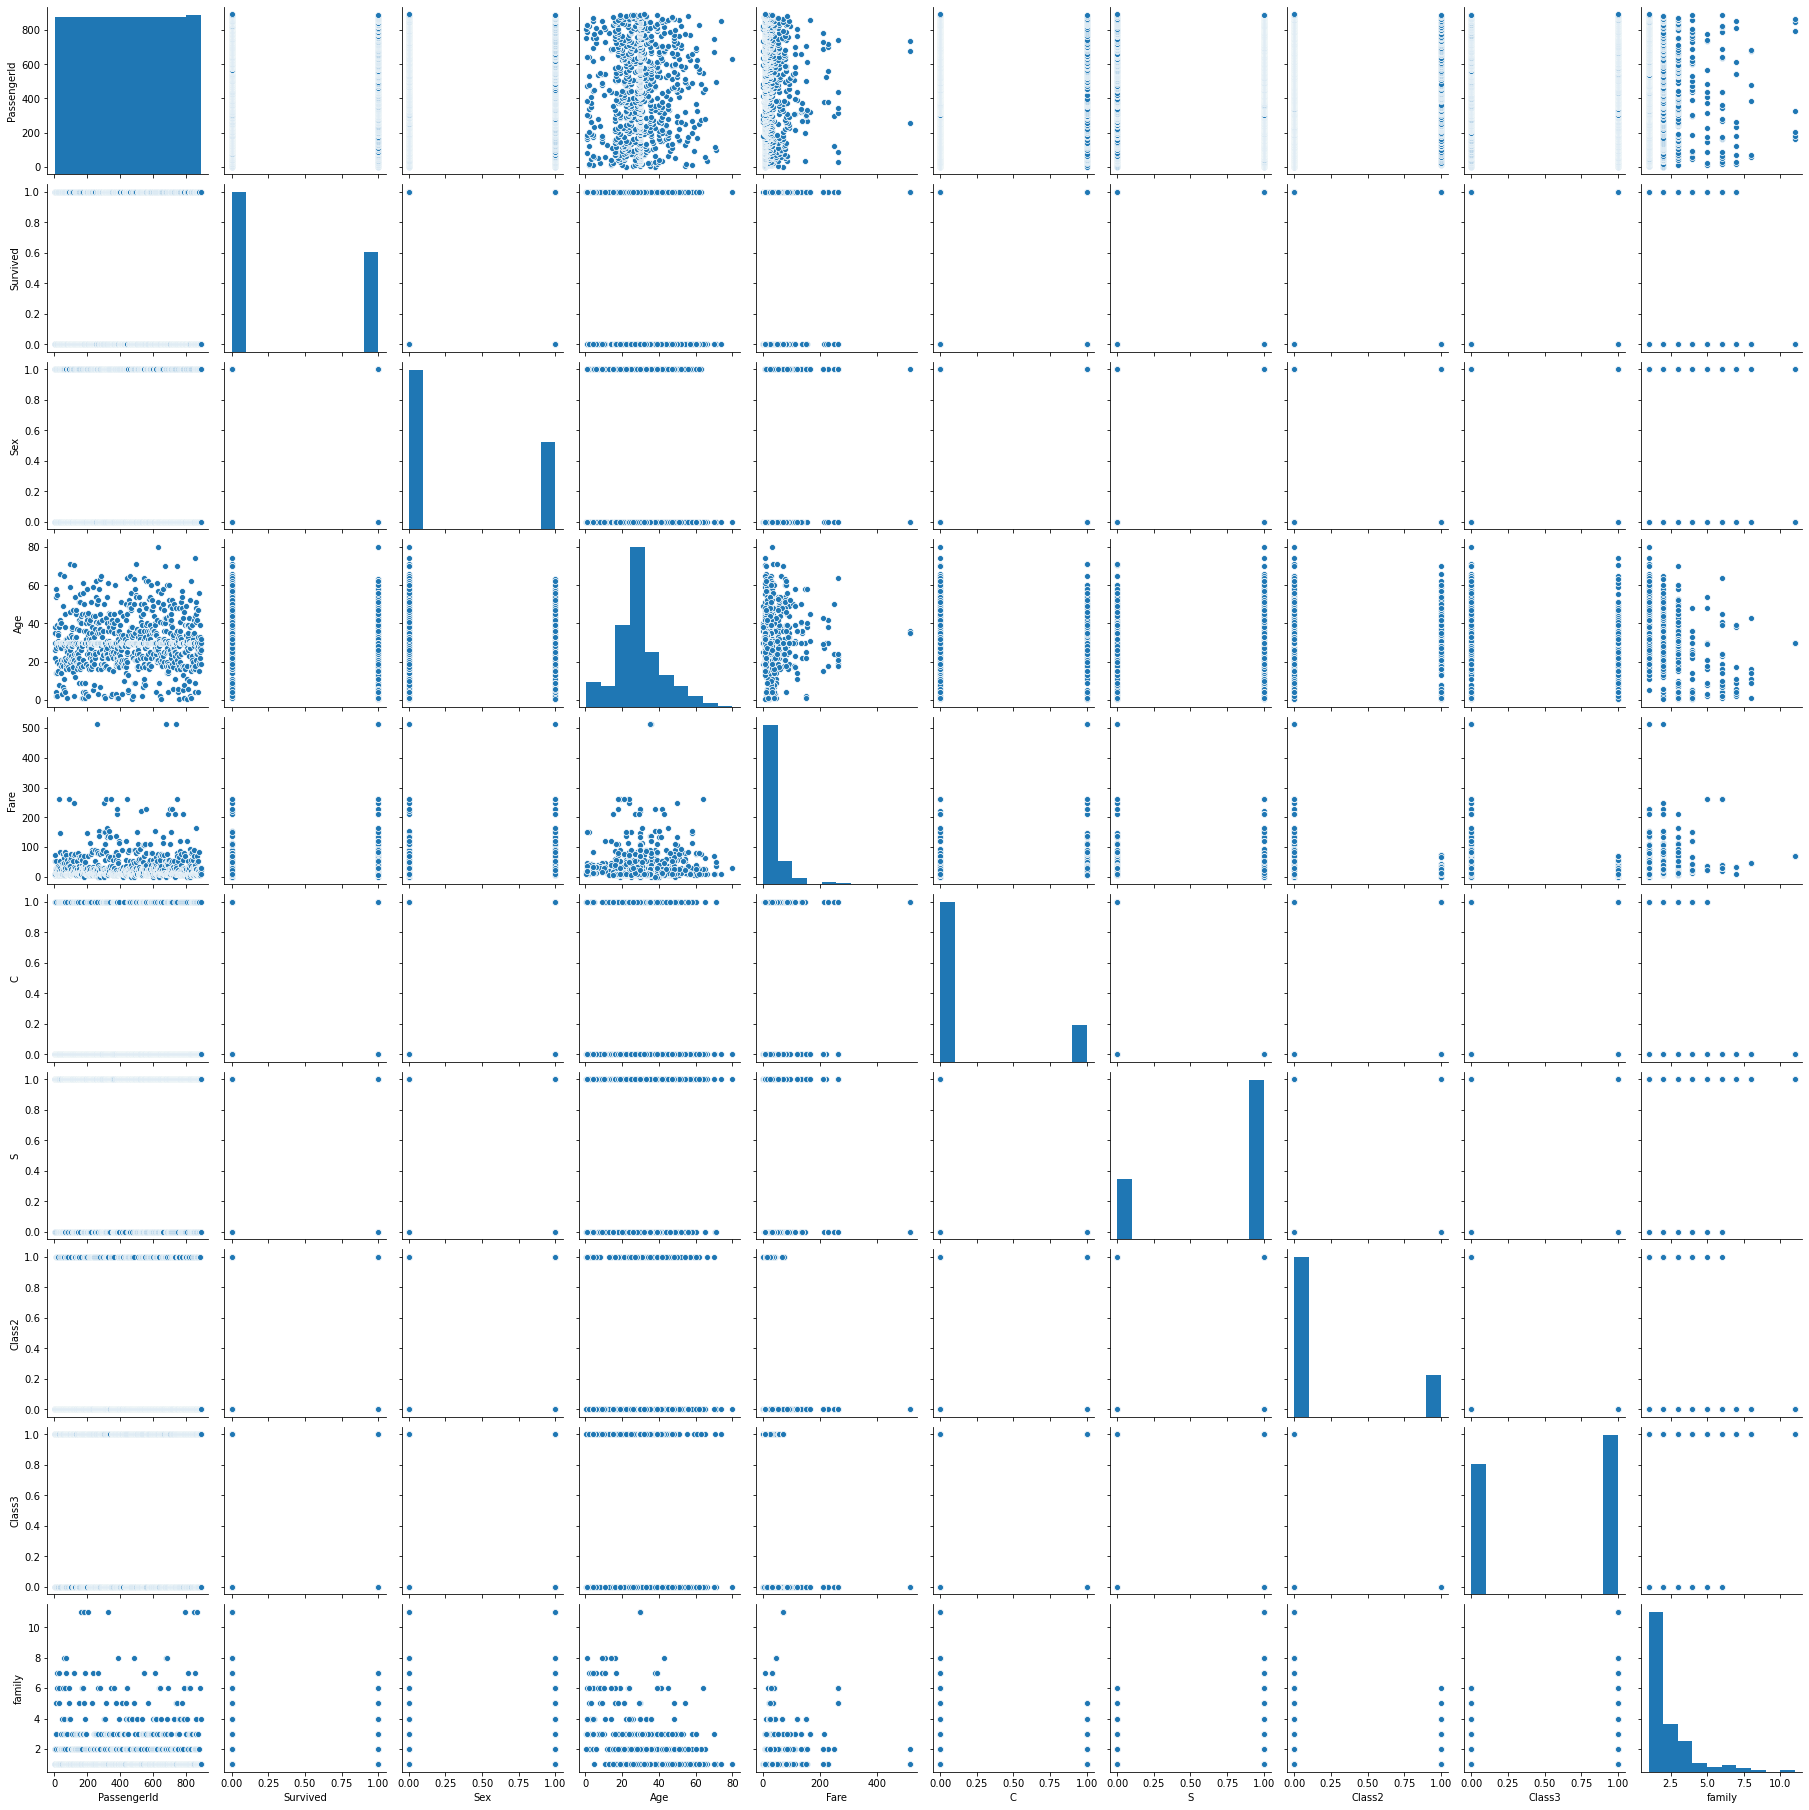

In [39]:
sns.pairplot(dftrain)

# Removing the outliers

In [40]:
f1 = dftrain[['Age','Fare']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
f1.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,Fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
90%,47.000000,77.958300
95%,54.000000,112.079150
99%,65.000000,249.006220


## here we see that the percentile values for the continuous numeric variable increases gradually that means we dont have outliers and the dataset is good to go

# Rescaling the features:
    let us resclae numeric and continuous features 'age' and 'fare' befor proceeding to model building

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
f=['Age','Fare']
dftrain[f] = scaler.fit_transform(dftrain[f])

In [44]:
dftrain.head()

,PassengerId,Survived,Sex,Age,Fare,C,S,Class2,Class3,family
0,1,0,0,0.271174,0.014151,0,1,0,1,2
1,2,1,1,0.472229,0.139136,1,0,0,0,2
2,3,1,1,0.321438,0.015469,0,1,0,1,1
3,4,1,1,0.434531,0.103644,0,1,0,0,2
4,5,0,0,0.434531,0.015713,0,1,0,1,1


# Checking the correlation among features

<AxesSubplot:>

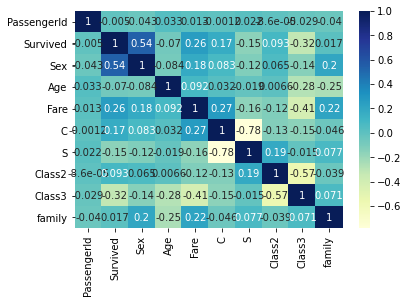

In [45]:
# plt.figure(figsize = (10, 10))
sns.heatmap(dftrain.corr(), annot = True, cmap="YlGnBu")

# Splitting the training data into x and y subsets to fit into the model

In [46]:
X=dftrain.drop(['Survived','PassengerId'], axis=1)
y=dftrain.Survived

In [47]:
# making training set among x and y variables
y_train = dftrain.pop('Survived')
X_train = dftrain

# Making & training I regression model

In [48]:
import statsmodels.api as sm
# Logistic regression model
X_train_sm=sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.89
Date:                Sat, 29 Aug 2020   Deviance:                       785.79
Time:                        21:27:07   Pearson chi2:                     902.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.4444      0.548      2.637      0.008       0.371       2.518
PassengerId     0.0001      0.000      0.374      0.708      -0.001       0.001
Sex             2.7407      0.201     13.653      0.000       2.347       3.134
Age            -3.0641      0.625     -4.903      0.000      -4.289      -1.839
Fare            1.2776      1.274      1.003      0.316      -1.219       3.774
C               0.0564      0.380      0.148      0.882      -0.689       0.802
S              -0.3990      0.331     -1.204      0.228      -1.048       0.250
Class2         -0.9074      0.297     -3.056      0.002      -1.489      -0.325
Class3         -2.1344      0.297     -7.176      0.000      -2.717      -1.551
family         -0.2221      0.068     -3.244      0.001      -0.356      -0.088
===============================================================================
"""

In [49]:
# Getting the predicted values on the train set
y_train_pred = logm1.fit().predict(X_train_sm)
y_train_pred

0      0.087391
1      0.926104
2      0.614157
3      0.895043
4      0.067747
         ...   
886    0.276901
887    0.954296
888    0.452606
889    0.618755
890    0.119949
Length: 891, dtype: float64

# Predicting the outcome acoording to the I model

In [50]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Surviving_Prob':y_train_pred.values})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Surviving_Prob,PassengerId
0,0,0.087391,0
1,1,0.926104,1
2,1,0.614157,2
3,1,0.895043,3
4,0,0.067747,4


In [51]:
y_train_pred_final['Prediction'] = y_train_pred_final.Surviving_Prob.map(lambda x: 1 if x > 0.5 else 0 )
y_train_pred_final.head()

,Survived,Surviving_Prob,PassengerId,Prediction
0,0,0.087391,0,0
1,1,0.926104,1,1
2,1,0.614157,2,1
3,1,0.895043,3,1
4,0,0.067747,4,0


# Analyzing the model using confusion matrix

In [52]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Prediction )
print(confusion)

[[475  74]
 [103 239]]


In [53]:
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Prediction) )

0.8013468013468014


# checking vif

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,S,6.66
2,Age,4.79
0,PassengerId,3.73
7,Class3,3.50
8,family,2.87
4,C,2.43
3,Fare,2.28
6,Class2,2.06
1,Sex,1.64


# Updating the model (II regression model)

In [55]:
# creating new model by reducing one more feature
X1 = X_train.drop('S', 1,)
X_train_sm = sm.add_constant(X1)

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.61
Date:                Sat, 29 Aug 2020   Deviance:                       787.22
Time:                        21:27:07   Pearson chi2:                     894.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0584      0.442      2.393      0.017       0.192       1.925
PassengerId     0.0001      0.000      0.349      0.727      -0.001       0.001
Sex             2.7765      0.200     13.911      0.000       2.385       3.168
Age            -3.0333      0.625     -4.853      0.000      -4.258      -1.808
Fare            1.3318      1.277      1.043      0.297      -1.172       3.835
C               0.4154      0.237      1.751      0.080      -0.049       0.880
Class2         -0.9129      0.298     -3.068      0.002      -1.496      -0.330
Class3         -2.0710      0.292     -7.093      0.000      -2.643      -1.499
family         -0.2345      0.068     -3.446      0.001      -0.368      -0.101
===============================================================================
"""

In [56]:
y_train_pred = logm2.fit().predict(X_train_sm)
y_train_pred

0      0.092362
1      0.926523
2      0.639999
3      0.899023
4      0.072856
         ...   
886    0.276733
887    0.955973
888    0.469751
889    0.610693
890    0.089271
Length: 891, dtype: float64

# Predicting the outcome acoording to the II model

In [57]:
y_train_pred_final1 = pd.DataFrame({'Survived':y_train.values, 'Surviving_Prob':y_train_pred.values})
y_train_pred_final1['PassengerId'] = y_train.index
y_train_pred_final1.head()

,Survived,Surviving_Prob,PassengerId
0,0,0.092362,0
1,1,0.926523,1
2,1,0.639999,2
3,1,0.899023,3
4,0,0.072856,4


In [58]:
y_train_pred_final1['Prediction'] = y_train_pred_final1.Surviving_Prob.map(lambda x: 1 if x > 0.5 else 0 )
y_train_pred_final1.head()

,Survived,Surviving_Prob,PassengerId,Prediction
0,0,0.092362,0,0
1,1,0.926523,1,1
2,1,0.639999,2,1
3,1,0.899023,3,1
4,0,0.072856,4,0


# checking VIF

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Age,3.74
0,PassengerId,3.51
6,Class3,3.04
7,family,2.73
3,Fare,2.18
5,Class2,1.76
1,Sex,1.64
4,C,1.34


# Analyzing the model's accuracy using confusion matrix

In [60]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final1.Survived, y_train_pred_final1.Prediction )
print(confusion)

[[475  74]
 [101 241]]


In [61]:
print(metrics.accuracy_score(y_train_pred_final1.Survived, y_train_pred_final1.Prediction) )

0.8035914702581369


In [62]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7046783625730995

In [64]:
# Let us calculate specificity
TN / float(TN+FP)

0.8652094717668488

In [65]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13479052823315119


In [66]:
# positive predictive value
print (TP / float(TP+FP))

0.765079365079365


In [67]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8246527777777778


# Plotting the ROC Curve
An ROC curve demonstrates several things: • It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). • The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. • The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

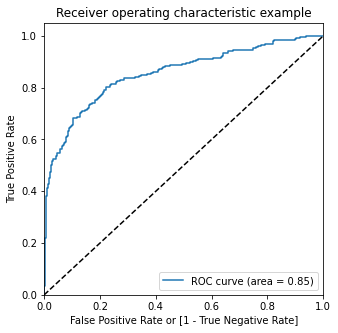

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final1.Survived, y_train_pred_final1.Surviving_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final1.Survived, y_train_pred_final1.Surviving_Prob)

# Finding Optimal Cutoff Point:
    Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [70]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final1[i]= y_train_pred_final1.Surviving_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final1.head()

,Survived,Surviving_Prob,PassengerId,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.092362,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.926523,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.639999,2,1,1,1,1,1,1,1,1,0,0,0
3,1,0.899023,3,1,1,1,1,1,1,1,1,1,1,0
4,0,0.072856,4,0,1,0,0,0,0,0,0,0,0,0


In [71]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final1.Survived, y_train_pred_final1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.571268  0.935673  0.344262
0.2   0.2  0.709315  0.853801  0.619308
0.3   0.3  0.772166  0.815789  0.744991
0.4   0.4  0.789001  0.757310  0.808743
0.5   0.5  0.803591  0.704678  0.865209
0.6   0.6  0.808081  0.649123  0.907104
0.7   0.7  0.796857  0.520468  0.969035
0.8   0.8  0.767677  0.409357  0.990893
0.9   0.9  0.696970  0.219298  0.994536


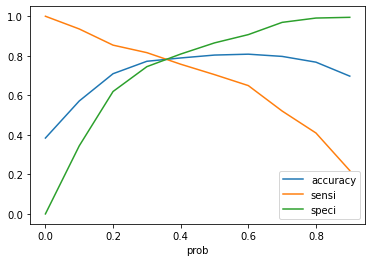

In [72]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [73]:
y_train_pred_final1['final_predicted'] = y_train_pred_final1.Surviving_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final1.head()

,Survived,Surviving_Prob,PassengerId,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.092362,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.926523,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.639999,2,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.899023,3,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.072856,4,0,1,0,0,0,0,0,0,0,0,0,0


# Analyzing the model's accuracy using confusion matrix

In [74]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final1.Survived, y_train_pred_final1.final_predicted)

0.7878787878787878

In [75]:
confusion2 = metrics.confusion_matrix(y_train_pred_final1.Survived, y_train_pred_final1.final_predicted )
confusion2

array([[432, 117],
       [ 72, 270]], dtype=int64)

In [76]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negative

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7894736842105263

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.7868852459016393

In [79]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21311475409836064


In [80]:
# Positive predictive value
print (TP / float(TP+FP))

0.6976744186046512


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8571428571428571


# Precision and Recall

In [82]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final1.Survived, y_train_pred_final1.final_predicted )
confusion

array([[432, 117],
       [ 72, 270]], dtype=int64)

# Precision TP / TP + FP

In [83]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6976744186046512

# Recall TP / TP + FN

In [84]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7894736842105263

# Using sklearn utilities for the same

In [85]:
from sklearn.metrics import precision_score, recall_score

In [86]:
#precision_score
precision_score(y_train_pred_final1.Survived, y_train_pred_final1.final_predicted )

0.6976744186046512

In [87]:
#recall_score
recall_score(y_train_pred_final1.Survived, y_train_pred_final1.final_predicted)

0.7894736842105263

# Precision and recall tradeoff

In [88]:
from sklearn.metrics import precision_recall_curve

In [89]:
y_train_pred_final1.Survived, y_train_pred_final1.final_predicted

(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    1
 889    1
 890    0
 Name: final_predicted, Length: 891, dtype: int64)

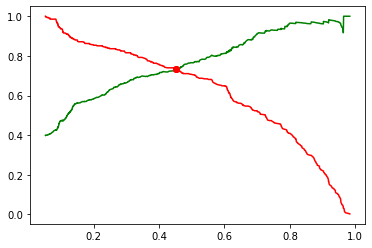

In [90]:
p, r, thresholds = precision_recall_curve(y_train_pred_final1.Survived, y_train_pred_final1.Surviving_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
idx = np.argwhere(np.diff(np.sign(p[:-1] - r[:-1]))).flatten()
plt.plot(thresholds[idx], p[:-1][idx], 'ro')
plt.show()

In [91]:
print(thresholds[idx])

[0.4518911  0.45265584]


we found that the threshold comes out to be 0.45
# Fitting the test data into the model

In [92]:
dftest.head()

,PassengerId,Sex,Age,Fare,C,S,Class2,Class3,family
0,892,0,34.5,7.8292,0,0,0,1,1
1,893,1,47.0,7.0000,0,1,0,1,2
2,894,0,62.0,9.6875,0,0,1,0,1
3,895,0,27.0,8.6625,0,1,0,1,1
4,896,1,22.0,12.2875,0,1,0,1,3


In [93]:
col=X1.columns

In [94]:
dftest[['Age','Fare']] = scaler.fit_transform(dftest[['Age','Fare']])

In [95]:
dftest = dftest[col]
dftest.head()

,PassengerId,Sex,Age,Fare,C,Class2,Class3,family
0,892,0,0.452723,0.015282,0,0,1,1
1,893,1,0.617566,0.013663,0,0,1,2
2,894,0,0.815377,0.018909,0,1,0,1
3,895,0,0.353818,0.016908,0,0,1,1
4,896,1,0.287881,0.023984,0,0,1,3


In [96]:
X_test_sm = sm.add_constant(dftest)

# Making predictions on the test set

In [97]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

0    0.076437
1    0.388939
2    0.081014
3    0.100722
4    0.581254
5    0.158757
6    0.614187
7    0.196758
8    0.795686
9    0.084933
dtype: float64

In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
0,0.076437
1,0.388939
2,0.081014
3,0.100722
4,0.581254


In [99]:
y_pred_final = pd.concat([dftest.PassengerId, y_pred_1],axis=1)
y_pred_final.head()

,PassengerId,0
0,892,0.076437
1,893,0.388939
2,894,0.081014
3,895,0.100722
4,896,0.581254


In [101]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Surviving_Prob'})
y_pred_final['final_predicted'] = y_pred_final.Surviving_Prob.map(lambda x: 1 if x > 0.45 else 0 )
y_pred_final.head(10)

,PassengerId,Surviving_Prob,final_predicted
0,892,0.076437,0
1,893,0.388939,0
2,894,0.081014,0
3,895,0.100722,0
4,896,0.581254,1
5,897,0.158757,0
6,898,0.614187,1
7,899,0.196758,0
8,900,0.795686,1
9,901,0.084933,0
